In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import copy
import seaborn as sns
import importlib

In [2]:
#load cmif libraries
os.chdir('/mnt/c/Users/engje/Documents/Data/')
from cmif.mplex_image import visualize as viz, process, preprocess

## Notes

add notes about tissue/staining observed while thresholding

- markers to exclude

CD45 has high nonspecific background

- imaging artifacts
- tissue loss, focusing issue, etc
- staining performance

AR, ER, low signal to noise

## Load Data

In [3]:
#set location of files
rootdir = '/mnt/c/Users/engje/Documents/Data/PipelineExample'
# go to location of files
os.chdir(rootdir)
preprocess.cmif_mkdir(['SpatialPlots'])
os.listdir()

['20200825_napari.py',
 '44290-146_Cropped',
 'BC44290-146-Scene-1 - DAPI.png',
 'BC44290-146-Scene-1 nuclei30 - Nuclei Segmentation Basins.tif',
 'BC44290-146-Scene-1_Ecad - _CytoProj.png',
 'BC44290-146-Scene-1_Ecad cell30 - Cell Segmentation Basins.tif',
 'BC44290-146-Scene-1_Ecad nuc30 matchedcell30 - Cell Segmentation Basins.tif',
 'BC44290-146-Scene-1_Ecad-cell30_exp5_CellSegmentationBasins.tif',
 'BC44290-146_ExposureTimes.csv',
 'features_BC44290-146_CentroidXY.csv',
 'features_BC44290-146_FilteredMeanIntensity_DAPI8Q_DAPI2.csv',
 'features_BC44290-146_MeanIntensity_Centroid_Shape.csv',
 'metadata_BC44290-146_RoundsCyclesTable.csv',
 'SpatialPlots',
 'thresh_BC44290-146_ThresholdLi.csv',
 'thresh_JE_BC44290-146.csv']

In [4]:
# 3 define samples to work with/ image combos
ls_sample = ['BC44290-146']
d_combos = {'AF':{'R0c2','R0c3','R0c4','R0c5','R8Qc2','R8Qc3','R8Qc4','R8Qc5'},
        'Stromal':{'PDPN','Vim','CD31','aSMA'}, 
        'Tumor':{'HER2','ER','AR','Ecad','CD44','Ki67','pHH3','PCNA'},
        'Immune':{'CD45','CD20R','CD68','PD1', 'CD8R', 'CD4R','CD3',},
        'Differentiation':{'CK7','CK19','CK14','CK17','CK5','CD44','Vim'},
        'Nuclear_ImmuneEarly':{ 'LamB1', 'LamAC','CD20','CD8', 'CD4',},
    }

In [7]:
for s_sample in ls_sample:
    df_mi = pd.read_csv(f'features_{s_sample}_FilteredMeanIntensity_DAPI8Q_DAPI2.csv',index_col=0)
    df_xy = pd.read_csv(f'features_{s_sample}_CentroidXY.csv',index_col=0)

In [8]:
#make thresh csv's
df_man = viz.new_thresh_csv(df_mi,d_combos)
if not os.path.exists(f'thresh_JE_{s_sample}.csv'):
    print('saving new csv')
    df_man.to_csv(f'thresh_JE_{s_sample}.csv',header=True)

## Calculate Positive

In [12]:
#load manual thresholds
df_thresh = viz.load_thresh_csv(s_sample)

In [13]:
#threshold
d_thresh_record,df_pos = viz.threshold_postive(df_thresh,df_mi)

Did not threshold {'DAPI6', 'DAPI8', 'DAPI2', 'ColIV', 'DAPI5', 'DAPI3', 'ColI', 'DAPI4', 'DAPI11', 'pAKT', 'DAPI0', 'CK5R', 'DAPI8Q', 'DAPI1', 'DAPI7'}


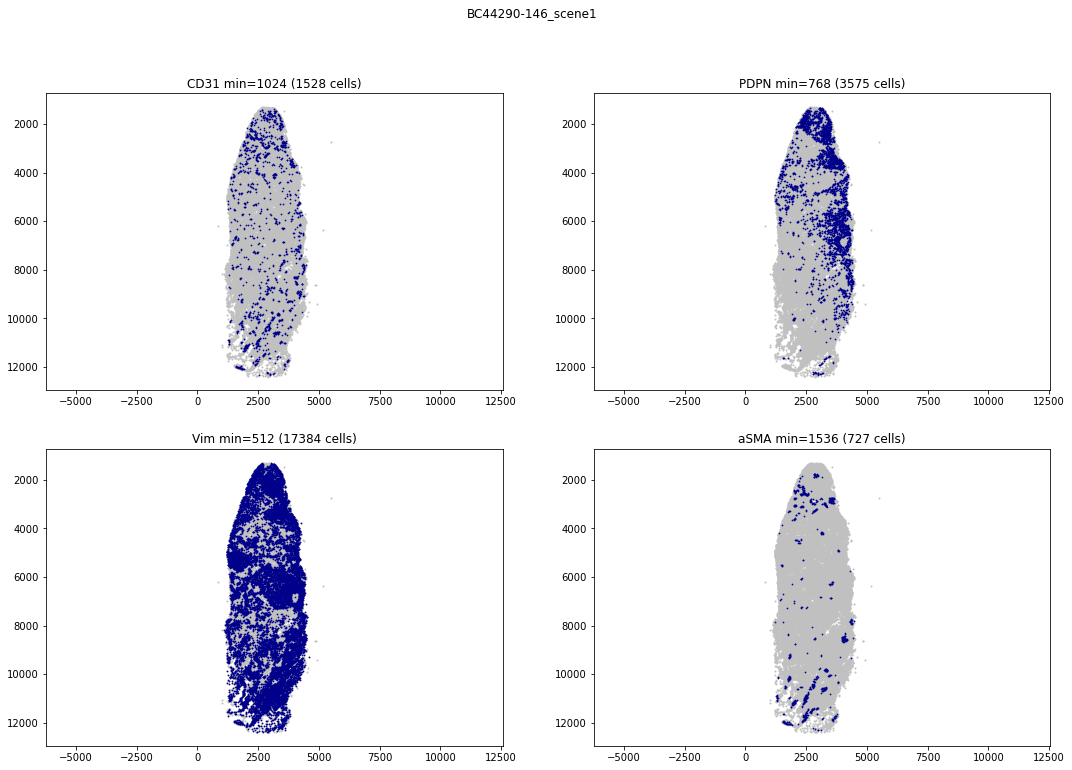

In [17]:
#visualize positive scatterplots
%matplotlib inline
#markers by type
s_type = 'Stromal'
#s_type = 'Tumor'
#s_type = 'Immune'
#s_type = 'Differentiation'

ls_fig = viz.plot_positive(s_type,d_combos,df_pos,d_thresh_record,df_xy)
for fig in ls_fig:
    plt.show(fig)

## Run When Done

Output the data and final thresholds

In [18]:
#drop columns not threhsolded
s_date = '20200826'
df_pos.columns = [item.replace('nuclei','Nuclei') for item in df_pos.columns]
df_pos.columns =[item.replace('perinuc5','Ring') for item in df_pos.columns]
df_pos.columns =[item.replace('cytoplasm','Ring') for item in df_pos.columns]

df_pos_manual = df_pos

#add DAPI_X and Y
df_pos_manual = pd.merge(df_pos_manual,df_xy.loc[:,['DAPI_X','DAPI_Y']],left_index=True,right_index=True)

if not os.path.exists(f'{s_date}_{s_sample}_ManualPositive.csv'):
    print('saving new csv')
    df_pos_manual.to_csv(f'{s_date}_{s_sample}_ManualPositive.csv')

saving new csv


In [19]:
df_pos_manual.columns

Index(['CD20R_Ring', 'CD4R_Ring', 'CD8R_Ring', 'CD20_Ring', 'CD3_Ring',
       'CD31_Ring', 'CD4_Ring', 'CD44_Ring', 'CD45_Ring', 'CD68_Ring',
       'CD8_Ring', 'PD1_Ring', 'PDPN_Ring', 'R0c2_Ring', 'R0c3_Ring',
       'R0c4_Ring', 'R0c5_Ring', 'R8Qc2_Ring', 'R8Qc3_Ring', 'R8Qc4_Ring',
       'R8Qc5_Ring', 'Vim_Ring', 'aSMA_Ring', 'CK14_Ring', 'CK17_Ring',
       'CK19_Ring', 'CK5_Ring', 'CK7_Ring', 'Ecad_Ring', 'HER2_Ring',
       'AR_Nuclei', 'ER_Nuclei', 'Ki67_Nuclei', 'LamAC_Nuclei', 'LamB1_Nuclei',
       'PCNA_Nuclei', 'R0c2_Nuclei', 'R0c3_Nuclei', 'R0c4_Nuclei',
       'R0c5_Nuclei', 'R8Qc2_Nuclei', 'R8Qc3_Nuclei', 'R8Qc4_Nuclei',
       'R8Qc5_Nuclei', 'pHH3_Nuclei', 'DAPI_X', 'DAPI_Y'],
      dtype='object')